In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from starter import read_data, inplace_min_max_scaling, accuracy, knn, calculate_downsample

In [ ]:
train_data = read_data('mnist_train.csv')
valid_data = read_data('mnist_valid.csv')
test_data = read_data('mnist_test.csv')

inplace_min_max_scaling(train_data)
inplace_min_max_scaling(test_data)
inplace_min_max_scaling(valid_data)

metrics = ['euclidean', 'cosim']

k_range = list(range(2, 11))
valid_accs = {metric: [] for metric in metrics}
train_accs = {metric: [] for metric in metrics}

for metric in metrics:
    for k in k_range:
        print()
        valid_accs[metric].append(accuracy(*knn(train_data, valid_data, metric, k=k)))
        train_accs[metric].append(accuracy(*knn(train_data, train_data, metric, k=k)))
        print()


     Running KNN for k = 2 with euclidean metric
     Running KNN for k = 2 with euclidean metric


     Running KNN for k = 3 with euclidean metric
     Running KNN for k = 3 with euclidean metric


     Running KNN for k = 4 with euclidean metric
     Running KNN for k = 4 with euclidean metric


     Running KNN for k = 5 with euclidean metric
     Running KNN for k = 5 with euclidean metric


     Running KNN for k = 6 with euclidean metric
     Running KNN for k = 6 with euclidean metric


     Running KNN for k = 7 with euclidean metric
     Running KNN for k = 7 with euclidean metric


     Running KNN for k = 8 with euclidean metric
     Running KNN for k = 8 with euclidean metric


     Running KNN for k = 9 with euclidean metric
     Running KNN for k = 9 with euclidean metric


     Running KNN for k = 10 with euclidean metric
     Running KNN for k = 10 with euclidean metric


     Running KNN for k = 2 with cosim metric
     Running KNN for k = 2 with cosim metric


     

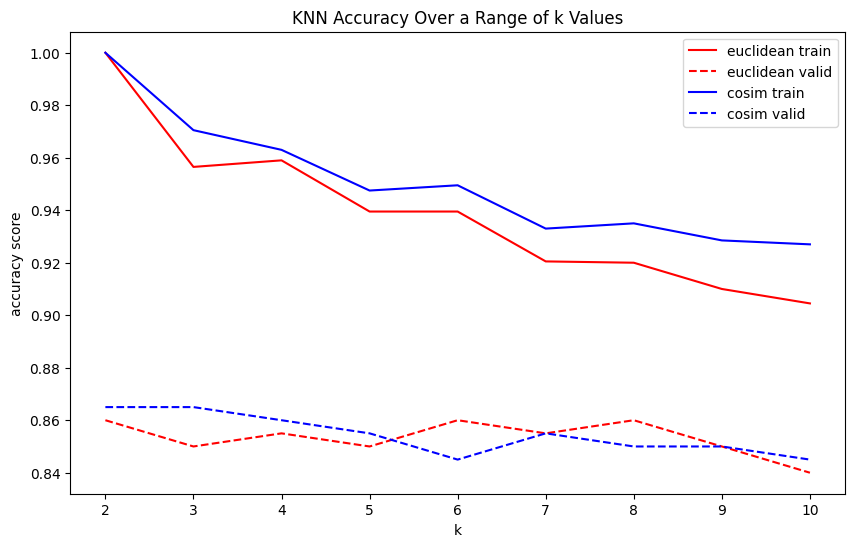

In [4]:
colors = ['red', 'blue']

plt.figure(figsize=(10, 6))

for idx, metric in enumerate(metrics):
    plt.plot(k_range, train_accs[metric], label=f"{metric} train", color=colors[idx], linestyle="-")

    plt.plot(k_range, valid_accs[metric], label=f"{metric} valid", color=colors[idx], linestyle="--")

    plt.xticks(k_range)

    plt.title('KNN Accuracy Over a Range of k Values')
    plt.xlabel('k')
    plt.ylabel('accuracy score')

    plt.legend()

plt.show()

In [11]:
np.argmax(valid_accs['euclidean'])

np.int64(0)

In [12]:
np.argmax(valid_accs['cosim'])

np.int64(0)

In [13]:
best_k = {'euclidean': 6, 'cosim': 7}

for metric in metrics:
    print()
    print(f'TEST SET ACCURACY FOR {metric} WITH K={best_k[metric]}:', accuracy(*knn(train_data, test_data, metric, k=best_k[metric])))
    print()


     Running KNN for k = 6 with euclidean metric
TEST SET ACCURACY FOR euclidean WITH K=6: 0.885


     Running KNN for k = 7 with cosim metric
TEST SET ACCURACY FOR cosim WITH K=7: 0.915



In [ ]:
# downsampled knn accuracy

train_copy = train_data.copy()
test_copy = test_data.copy()
valid_copy = valid_data.copy()
calculate_downsample(train_copy) # inplace calculation of downsample -- reduces the dataset by half exactly
calculate_downsample(test_copy)
calculate_downsample(valid_copy)

train_data = read_data('mnist_train.csv')
valid_data = read_data('mnist_valid.csv')
test_data = read_data('mnist_test.csv')

inplace_min_max_scaling(train_data)
inplace_min_max_scaling(test_data)
inplace_min_max_scaling(valid_data)

metrics = ['euclidean', 'cosim']

k_range = list(range(2, 11))
valid_accs = {metric: [] for metric in metrics}
train_accs = {metric: [] for metric in metrics}

for metric in metrics:
    for k in k_range:
        print()
        valid_accs[metric].append(accuracy(*knn(train_data, valid_data, metric, k=k)))
        train_accs[metric].append(accuracy(*knn(train_data, train_data, metric, k=k)))
        print()